In [40]:
import pandas as pd
df = pd.DataFrame(np.random.rand(5, 10))

df

,0,1,2,3,4,5,6,7,8,9
0,0.155032,0.423119,0.325538,0.769612,0.433616,0.655408,0.523776,0.432618,0.206450,0.762300
1,0.542721,0.296569,0.931251,0.458114,0.940599,0.770067,0.604872,0.237776,0.402187,0.312284
2,0.632841,0.483667,0.526039,0.981213,0.233545,0.084587,0.261088,0.036738,0.717802,0.440920
3,0.560085,0.585463,0.881727,0.637938,0.437022,0.816256,0.289898,0.245515,0.708363,0.057917
4,0.473539,0.600196,0.890784,0.957959,0.716915,0.153063,0.872626,0.764292,0.403991,0.895119


# AgglomerativeClustering

In [15]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate random data points
X = np.random.rand(100, 2)

# Perform agglomerative clustering
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(df)

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f"Silhouette score: {silhouette_avg}")


Silhouette score: 0.2319104088751061


D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


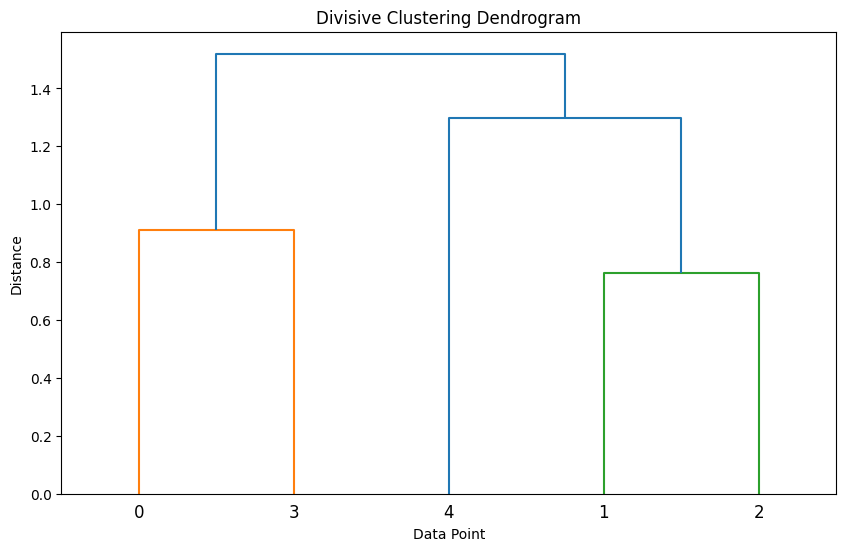

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def divisive_clustering_with_dendrogram(X):
    # Perform divisive clustering using linkage
    Z = linkage(X, method='ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    plt.title('Divisive Clustering Dendrogram')
    plt.xlabel('Data Point')
    plt.ylabel('Distance')
    dendrogram(Z)
    plt.show()

# Example usage
# Generate random data points
X = np.random.rand(10, 2)

# Perform divisive clustering with dendrogram
divisive_clustering_with_dendrogram(df)


# divisive_clustering

In [25]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def divisive_clustering(X, n_clusters):
    # Create a single cluster encompassing all data points
    cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    labels = cluster.fit_predict(X)
    
    # Recursively divide the cluster until desired number of clusters is reached
    while len(np.unique(labels)) < n_clusters:
        max_label = np.argmax(np.bincount(labels))
        indices = np.where(labels == max_label)[0]
        
        # Divide the cluster into two subclusters
        sub_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        sub_labels = sub_cluster.fit_predict(X[indices])
        
        # Update the labels by incorporating the subcluster labels
        labels[indices[sub_labels == 0]] = max_label
        labels[indices[sub_labels == 1]] = max_label + 1
    
    return labels

# Example usage
# Generate random data points
X = np.random.rand(100, 2)

# Perform divisive clustering
n_clusters = 3
cluster_labels = divisive_clustering(X, n_clusters)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"Silhouette score: {silhouette_avg}")


Silhouette score: 0.3464197506473578


D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


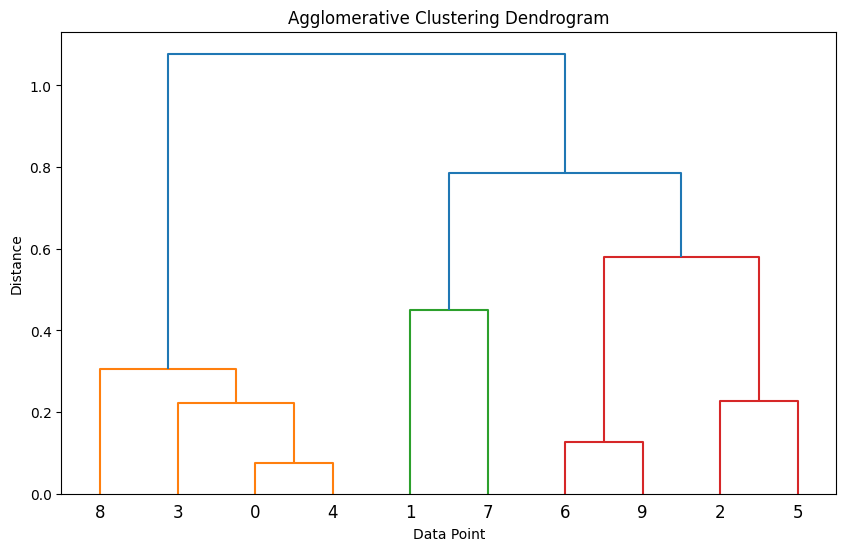

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random data points
X = np.random.rand(10, 2)

# Perform agglomerative clustering using linkage
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


# K means clustering

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate random data points
X = np.random.rand(100, 2)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(df)

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f"Silhouette score: {silhouette_avg}")


Silhouette score: 0.2319104088751061


D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


D:\projects_working_on\deep_fake\DeepFake\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


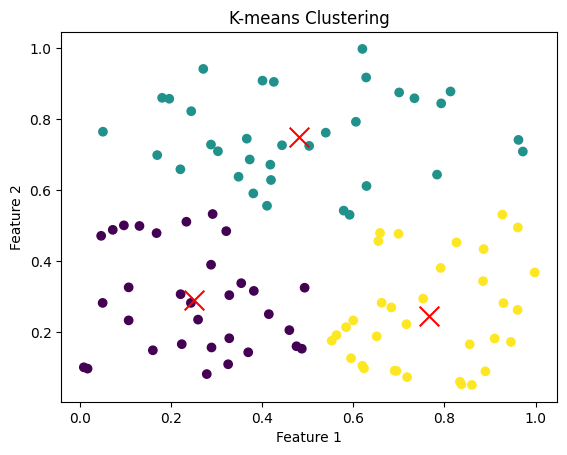

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random data points
X = np.random.rand(100, 2)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the data points and clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()
